In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import swifter
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.decomposition import TruncatedSVD

import utils

plt.style.use('fivethirtyeight')

Data prep

In [2]:
text_dir = '../input/alta2018patents/patents/cleaned_patents/'

train = pd.read_csv('../input/alta2018traindata/train_data.csv')
train['filename'] = [text_dir] + train['id'].astype(str) + ['.txt']

test = pd.read_csv('../input/alta2018testdata/test_data.csv')
test['filename'] = [text_dir] + test['id'].astype(str) + ['.txt']


train_texts = train['filename']
test_texts = test['filename']   
train_labels = train['first_ipc_mark_section']

In [3]:
tfidf = TfidfVectorizer( 
    input='filename',
    encoding='iso8859-1',
    stop_words='english',
    strip_accents='unicode',
    sublinear_tf=True,
    min_df=5,
    ngram_range=(1,2)
)

clf = Pipeline(steps=[
    ('tfidf', tfidf), 
    ('svm', LinearSVC(class_weight='balanced'))
])

In [8]:
scores = utils.get_train_scores(clf, train_texts, train_labels)
scores.mean()

0.7341341746429964

Now let's try with Fasttext word embeedings. We'll represent each document as a naive averaged vector of all the tokens in the document 

In [ ]:
embeddings = utils.load_fasttext_vectors('/home/ubuntu/wiki-news-300d-1M-subword.vec')

clf_ft = clf = Pipeline(steps=[
    ('embeddings', utils.MeanEmbeddingVectorizer(embeddings)), 
    ('svm', LinearSVC(class_weight='balanced'))
])

Get scores on training set using cross-fold validation:

In [ ]:
scores = utils.get_train_scores(clf_ft, train_texts, train_labels)
scores.mean()

/home/ubuntu/.pyenv/versions/3.7.0/envs/alta/lib/python3.7/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Generate a subission:

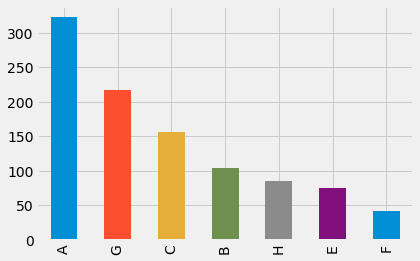

In [11]:
clf.fit(train_texts, train_labels)
test['first_ipc_mark_section'] = clf.predict(test_texts)
test[['id', 'first_ipc_mark_section']].to_csv('test_results.csv', index=False)
test['first_ipc_mark_section'].value_counts().plot.bar()